## Hirerachical Clustiering

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

print("First 5 rows:")
print(df.head())

First 5 rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
scaled_data

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

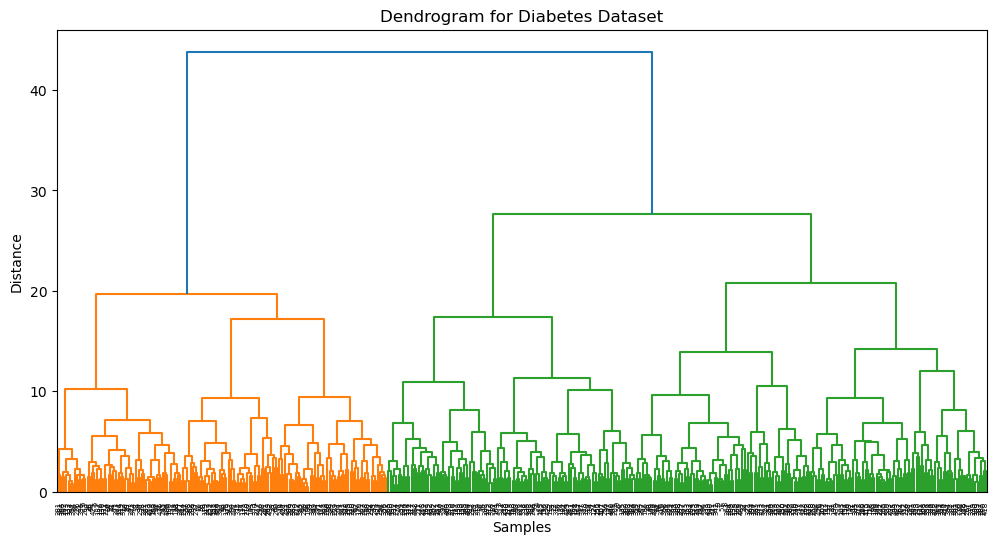

In [5]:
plt.figure(figsize=(12, 6))
linked = linkage(scaled_data, method='ward')  # Ward linkage (best for Euclidean)
dendrogram(linked)
plt.title("Dendrogram for Diabetes Dataset")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [ ]:
NOTE:
# From the dendrogram, we manually decide the number of clusters.
# Usually the largest vertical distance cut (without crossing branches) is selected.
# Suppose dendrogram suggests: 3 clusters (common choice)

In [7]:
hier_model = AgglomerativeClustering(
    n_clusters=3,        # decided from dendrogram
    metric='euclidean',
    linkage='ward'
)

In [8]:
hier_labels = hier_model.fit_predict(scaled_data)

In [9]:
# Add labels to dataframe
df["hier_cluster"] = hier_labels

print("\nHierarchical Clustering Labels (first 20):")
print(hier_labels[:20])


Hierarchical Clustering Labels (first 20):
[0 1 0 2 2 1 1 0 0 2 1 0 1 0 1 0 2 0 2 1]


In [10]:
sil_score = silhouette_score(scaled_data, hier_labels)
print("\nSilhouette Score:", sil_score)



Silhouette Score: 0.12496473908632355


In [11]:
print("\nData with cluster labels:")
print(df.head(10))


Data with cluster labels:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  hier_cluster  
0 -0.002592  0.019907 -0.017646             0  
1 -0.039493 -0.068332 -0.092204             1  
2 -

## DB SCAN

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [14]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
data = df[["age", "fare", "pclass", "sex", "alone"]]

In [16]:
data.head(2)

,age,fare,pclass,sex,alone
0,22.0,7.2500,3,male,False
1,38.0,71.2833,1,female,False


In [17]:
# Categorical → numerical
data = pd.get_dummies(data, drop_first=True)

# Missing values fill
data["age"] = data["age"].fillna(data["age"].median())

print("\nAfter preprocessing:\n", data.head())


After preprocessing:
     age     fare  pclass  alone  sex_male
0  22.0   7.2500       3  False      True
1  38.0  71.2833       1  False     False
2  26.0   7.9250       3   True     False
3  35.0  53.1000       1  False     False
4  35.0   8.0500       3   True      True


In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [19]:
#--------------------------------------------
# STEP 4: K-Distance Graph to find epsilon (eps)
#--------------------------------------------
# min_samples: rule → n_features + 1
min_samples_value = data.shape[1] + 1  # e.g., 6 features → min_samples=7
print("\nMin Samples Selected =", min_samples_value)


Min Samples Selected = 6


In [20]:
neighbors = NearestNeighbors(n_neighbors=min_samples_value)
neighbors_fit = neighbors.fit(X)

In [21]:
distances, indices = neighbors_fit.kneighbors(X)

In [22]:
# Sort distances (k-distance)
distances = np.sort(distances[:, min_samples_value - 1])

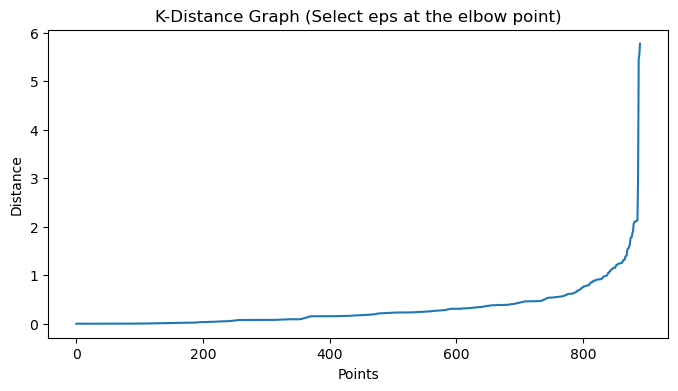

In [23]:
# Plot K-distance graph
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("K-Distance Graph (Select eps at the elbow point)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

In [24]:
#--------------------------------------------
# STEP 5: Choose eps from graph (manually after elbow)
#--------------------------------------------
# Typically eps will be around the knee point; assume ~0.55 after viewing plot.
eps_value = 0.55
print("\nChosen eps =", eps_value)


Chosen eps = 0.55


In [25]:
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X)

In [26]:
# Add cluster labels to original dataframe
df["cluster"] = clusters

print("\nCluster count:\n", df["cluster"].value_counts())


Cluster count:
 cluster
 3     254
-1      87
 5      81
 0      79
 7      69
 4      67
 2      57
 6      42
 1      40
 8      30
 9      30
 12     22
 13     17
 11      9
 10      7
Name: count, dtype: int64


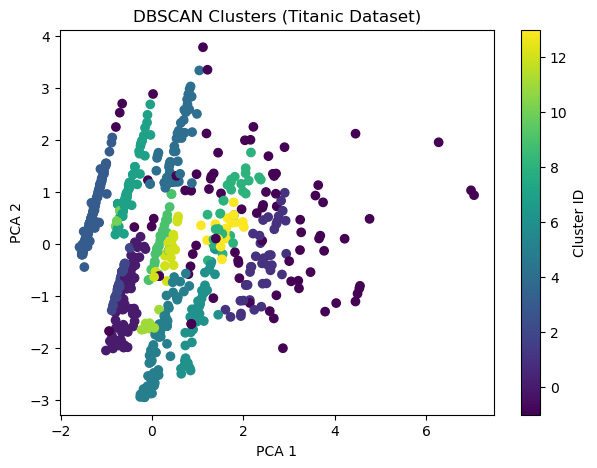

In [27]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap="viridis")
plt.title("DBSCAN Clusters (Titanic Dataset)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()